In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df=pd.read_csv("UK Outward Passengers Movement.csv")

In [174]:
df.head()

,Quarter,Ireland,Other EU not Ireland,Rest of Europe and Med,Rest of World,Total
Year,,,,,,
1996-01-01,1,708.0,4084.0,1233.0,4198.0,10222.0
1996-04-01,2,845.0,6329.0,1684.0,4691.0,13549.0
1996-08-01,3,1053.0,7617.0,2075.0,2887.0,16632.0
1996-12-01,4,853.0,4788.0,1406.0,4936.0,11983.0
1997-01-01,1,794.0,4311.0,1368.0,4534.0,11007.0


In [41]:
df.tail()

,Year,Quarter,Ireland,Other EU not Ireland,Rest of Europe and Med,Rest of World,Total
37,01-04-2005,2,1472.0,11918.0,3490.0,6091.0,22971.0
38,01-08-2005,3,1656.0,14288.0,4405.0,7276.0,27624.0
39,01-12-2005,4,1466.0,9092.0,3072.0,6497.0,20127.0
40,01-01-2006,1,NaN,NaN,NaN,NaN,NaN
41,01-04-2006,2,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    42 non-null     object 
 1   Quarter                 42 non-null     int64  
 2   Ireland                 40 non-null     float64
 3   Other EU not Ireland    40 non-null     float64
 4   Rest of Europe and Med  40 non-null     float64
 5   Rest of World           40 non-null     float64
 6   Total                   40 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ KB


In [43]:
df.describe()

,Quarter,Ireland,Other EU not Ireland,Rest of Europe and Med,Rest of World,Total
count,42.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.452381,1165.000000,8399.825000,2213.575000,5636.900000,17494.175000
std,1.130560,214.535634,2731.410032,696.631157,875.415705,4230.512583
min,1.000000,708.000000,4084.000000,1233.000000,2887.000000,10222.000000
25%,1.250000,1040.000000,6364.250000,1681.000000,5087.250000,14205.750000
50%,2.000000,1158.000000,7972.500000,2071.500000,5551.000000,16998.500000
75%,3.000000,1311.750000,10178.500000,2623.000000,6362.000000,20006.250000
max,4.000000,1656.000000,14288.000000,4405.000000,7276.000000,27624.000000


In [44]:
import datetime

In [144]:
df['Year']=pd.to_datetime(df['Year'], format='%d-%m-%Y')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    42 non-null     datetime64[ns]
 1   Quarter                 42 non-null     int64         
 2   Ireland                 40 non-null     float64       
 3   Other EU not Ireland    40 non-null     float64       
 4   Rest of Europe and Med  40 non-null     float64       
 5   Rest of World           40 non-null     float64       
 6   Total                   40 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.4 KB


In [146]:
df.set_index('Year',inplace=True)

In [147]:
df.head()

,Quarter,Ireland,Other EU not Ireland,Rest of Europe and Med,Rest of World,Total
Year,,,,,,
1996-01-01,1,708.0,4084.0,1233.0,4198.0,10222.0
1996-04-01,2,845.0,6329.0,1684.0,4691.0,13549.0
1996-08-01,3,1053.0,7617.0,2075.0,2887.0,16632.0
1996-12-01,4,853.0,4788.0,1406.0,4936.0,11983.0
1997-01-01,1,794.0,4311.0,1368.0,4534.0,11007.0


In [49]:
df.shape

(42, 6)

In [148]:
df1=pd.DataFrame()
df1=df.drop(columns=['Quarter','Ireland','Other EU not Ireland ','Rest of Europe and Med','Rest of World'])

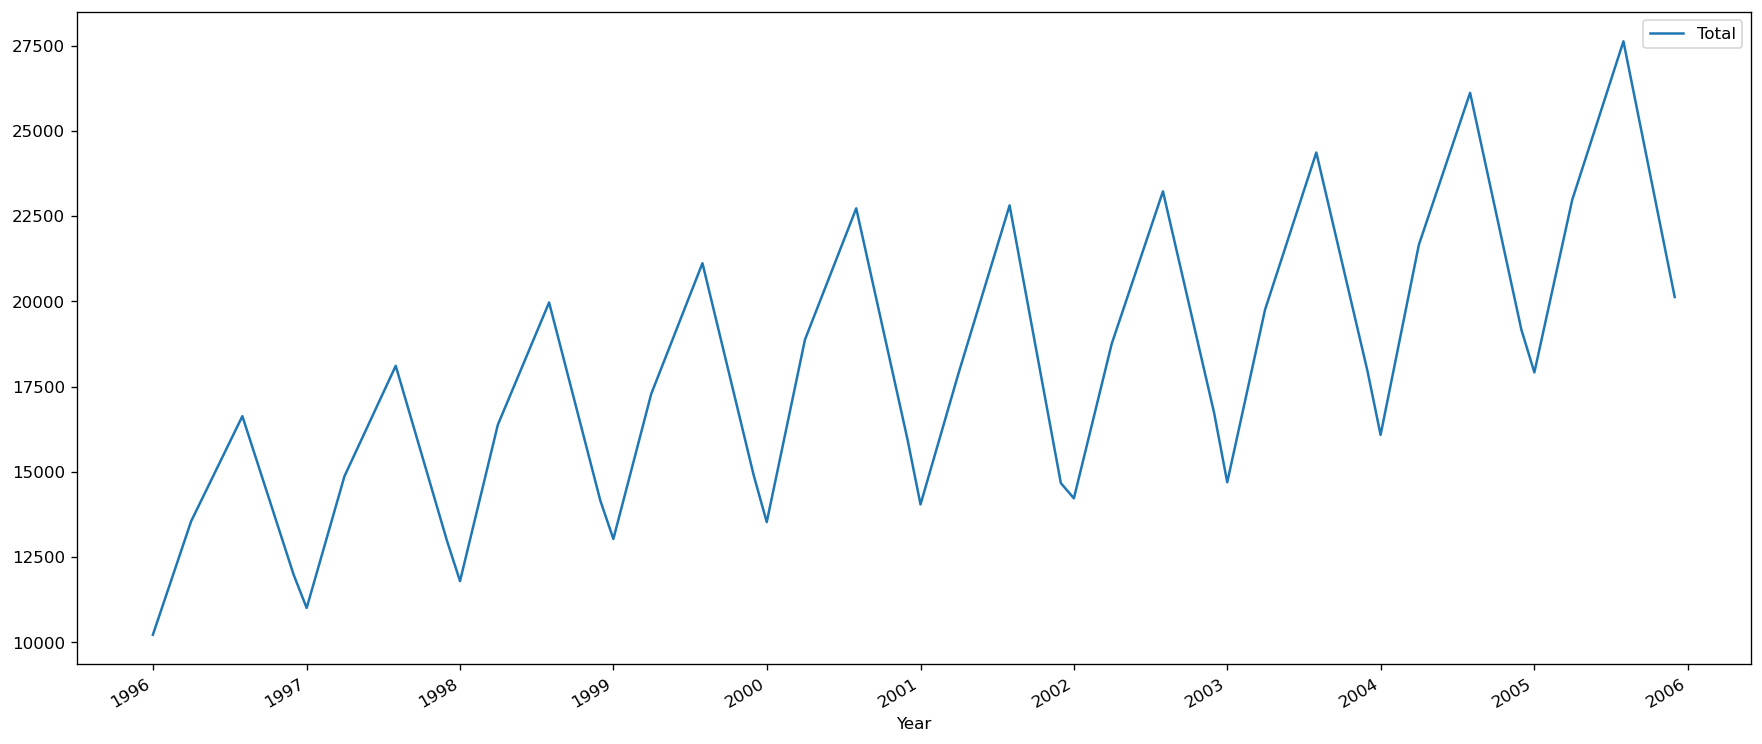

In [149]:
df1.plot()

In [116]:
df_day=df1.resample('D').sum()

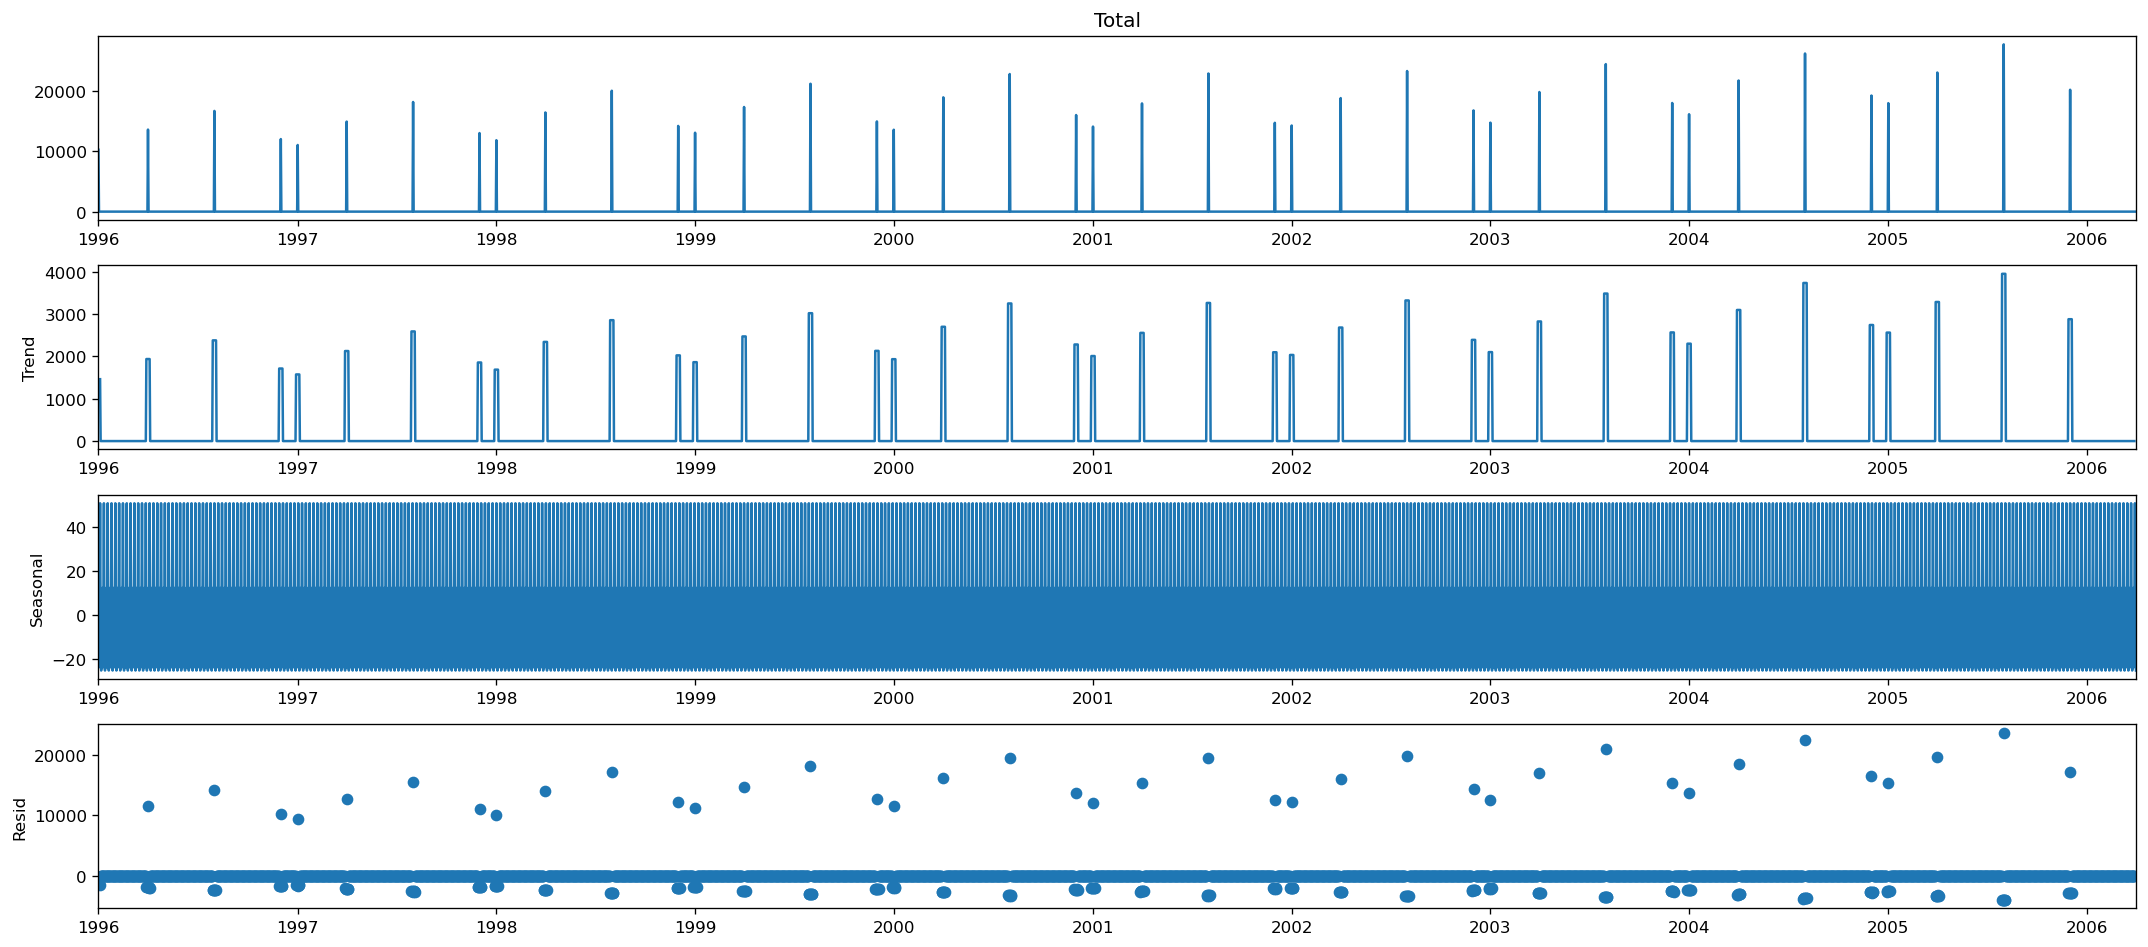

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_day['Total'])
result.plot()
plt.show()

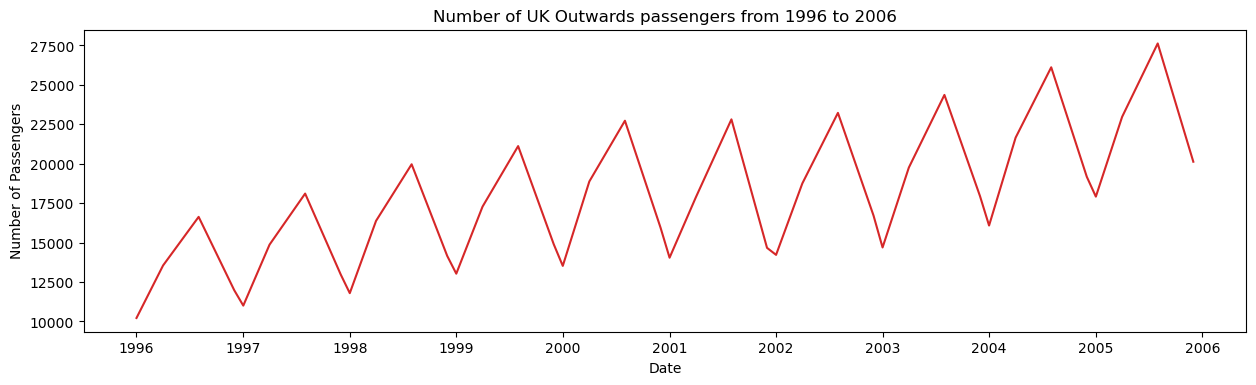

In [93]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df.index, y=df['Total'], title='Number of UK Outwards passengers from 1996 to 2006')

In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(8, 4))

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

    dftest = adfuller(timeseries, autolag='AIC')  #AIC is chi value
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
              dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

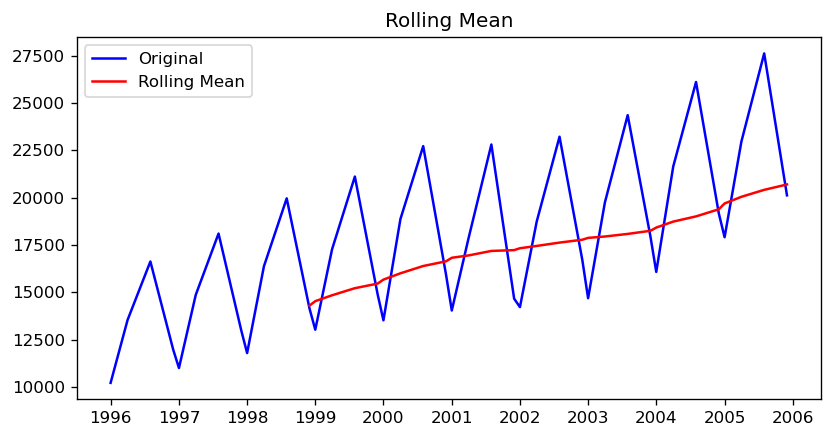

Test Statistic                 -0.175190
p-value                         0.941415
#Lags Used                      8.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [106]:
test_stationarity(df1['Total'])

In [78]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [158]:
df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [107]:
auto_arima_model=auto_arima(df1['Total'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=715.564, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=779.180, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=780.644, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=721.604, Time=0.13 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=731.601, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=714.651, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=756.889, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(4,2,2)(

In [159]:
arima_model = ARIMA(df1['Total'].dropna(), order=(3,2,1)).fit()

In [173]:
start = df1.index.get_loc('01-01-2006')
end = df1.index.get_loc('04-01-2006')
print(start,'to',end)

40 to 41


In [161]:
predict_1= arima_model.predict(start=start+1 ,end=end+1, dynamic= False)

In [166]:
pred_future_10101=arima_model.predict(start=len(df1)+1,end=len(df1)+(120),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))

The length of pred_future values : 120
